# Poisson confidence intervals in HEP

**References:**
- [Poisson confidence interval](../../confidence_intervals/poisson_parameter_confidence_interval.ipynb)
- [Asimov paper](https://arxiv.org/abs/1007.1727)
- [G. Cowan: Statistical Methods for Particle Physics (GGI lectures 3/3)](https://www.youtube.com/watch?v=jSIpGKRmS1A&index=4&list=PLDxsZU4NC6Z5DFFFx2bj03phoZpP1qrp2&t=0s)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

In [2]:
def calc_lambda_CI_upper(n_obs, alpha=0.05):
    """Calculates the one-sided, upper bound confidence interval with α significance level"""
    chi2_df = 2 * (n_obs+1)
    lambda_UL = 0.5 * scipy.stats.chi2.ppf(1.0-alpha, df=chi2_df)
    return lambda_UL

## Poisson count measurement - Example of a negative upper limit

\begin{equation}
    N \sim Poi(\lambda=b+s)
\end{equation}

where
- $b$ is some known background, here $b=2.5$
- $s$ is the signal contribution on which we wish to impose an upper limit

In [3]:
b = 5
n = 0
alpha = 0.05

In [4]:
lambda_UL = calc_lambda_CI_upper(n, alpha=alpha)
lambda_UL

2.99573227355399

In [5]:
s_UL = lambda_UL - b
s_UL

-2.00426772644601

In [6]:
calc_lambda_CI_upper(n, alpha=0.05) - b

-2.00426772644601

### Simulation under the assumption there is only background

In [7]:
nsamples = 1000
alpha = 0.05
lambda_true = b

Generating samples

In [8]:
n_obs = scipy.stats.poisson.rvs(mu=lambda_true, size=nsamples)

Calculating corresponding upper limits

In [9]:
s_ULs = np.array([calc_lambda_CI_upper(n, alpha=alpha)-b for n in n_obs])

Concetanating

In [10]:
experiments = np.c_[n_obs, s_ULs]

Characteristic values of $s^{U.L.}$ (median, $\pm 1/2 \sigma$)

In [11]:
m2s = scipy.stats.norm.cdf(-2)
m1s = scipy.stats.norm.cdf(-1)
p1s = scipy.stats.norm.cdf(+1)
p2s = scipy.stats.norm.cdf(+2)
m2s, m1s, p1s, p2s

(0.022750131948179195,
 0.15865525393145707,
 0.84134474606854293,
 0.97724986805182079)

In [12]:
s_UL_m2s = np.percentile(s_ULs, m2s*100)
s_UL_m1s = np.percentile(s_ULs, m1s*100)
s_UL_med = np.percentile(s_ULs, 0.5*100)
s_UL_p1s = np.percentile(s_ULs, p1s*100)
s_UL_p2s = np.percentile(s_ULs, p2s*100)
s_UL_m2s, s_UL_m1s, s_UL_med, s_UL_med, s_UL_p1s, s_UL_p2s

(-0.25613548160942301,
 2.7536565279327263,
 5.5130349087415329,
 5.5130349087415329,
 8.1481138024321176,
 11.9622192357219)

### Distribution of $s^{U.L.}$

Text(0.5,0,'$s^{U.L.}$')

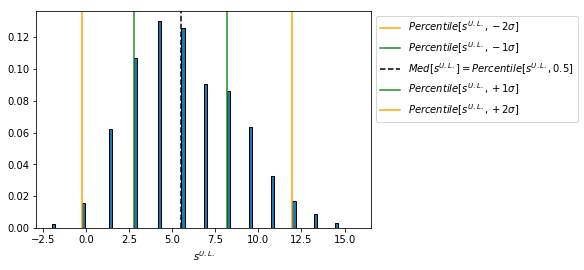

In [13]:
fig, ax = plt.subplots()
bins = np.unique(s_ULs)
ax.hist(s_ULs, bins=bins, density=True, width=0.2, edgecolor='k');
ax.axvline(s_UL_m2s, linestyle='-',  c='orange', label=r'$Percentile[s^{U.L.}, -2\sigma]$')
ax.axvline(s_UL_m1s, linestyle='-',  c='forestgreen', label=r'$Percentile[s^{U.L.}, -1\sigma]$')
ax.axvline(s_UL_med, linestyle='--', c='k', label=r'$Med[s^{U.L.}] = Percentile[s^{U.L.}, 0.5]$')
ax.axvline(s_UL_p1s, linestyle='-',  c='forestgreen', label=r'$Percentile[s^{U.L.}, +1\sigma]$')
ax.axvline(s_UL_p2s, linestyle='-',  c='orange', label=r'$Percentile[s^{U.L.}, +2\sigma]$')
ax.legend(loc='upper left',  bbox_to_anchor=(1,1))
ax.set_xlabel(r"$s^{U.L.}$")

## Brazilian plot

Taking the first experiment as an example for the observed value

In [14]:
n_obs = experiments[0,0]
s_UL_obs = experiments[0,1]

In [15]:
print("Assumed background: ", b)
print("Observed number of events: ", n_obs)
print("Observed upper limit on s: ", experiments[0,1])
print("Expected upper limit on s assuming there is only background: ", s_UL_med)

Assumed background:  5
Observed number of events:  2.0
Observed upper limit on s:  1.29579362187
Expected upper limit on s assuming there is only background:  5.51303490874


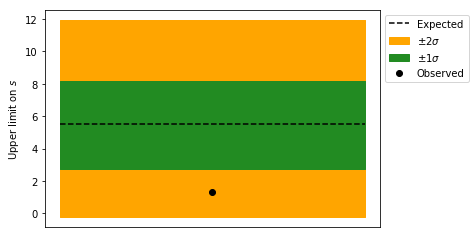

In [16]:
fig, ax = plt.subplots()
ax.hlines(y=s_UL_med, xmin=-1.0, xmax=1.0, linestyle='--', label='Expected')
ax.set_ylabel(r"Upper limit on $s$")
ax.fill_between((-1.0, 1.0), s_UL_m2s, s_UL_p2s, color='orange', label='$\pm 2\sigma$')
ax.fill_between((-1.0, 1.0), s_UL_m1s, s_UL_p1s, color='forestgreen', label='$\pm 1\sigma$')
ax.scatter(0.0, s_ULs[0], c='k', label='Observed')
ax.get_xaxis().set_visible(False)
ax.legend(loc='upper left',  bbox_to_anchor=(1,1))

### Consistency check on the observed value of $s^{U.L.}$

Plugging back in $s^{U.L.}_{obs}$ to $\lambda$, and calculating the p-value for $N=n_{obs}$ we should get back $\alpha$.

In [17]:
lambda_H1 = s_UL_obs + b
lambda_H1

6.2957936218719883

In [18]:
pvalue = scipy.stats.poisson.cdf(n_obs, mu=lambda_H1)
pvalue

0.050000000000000031

In [19]:
epsilon = 1e-5

In [20]:
if abs(pvalue-alpha) < epsilon:
    print("Consistent.")

Consistent.
